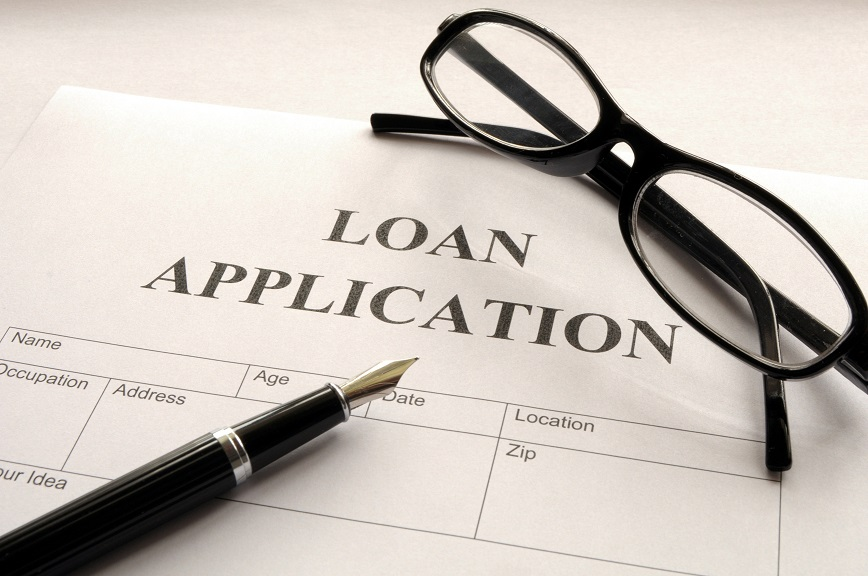

### Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

Dependent Variable (Target Variable):
- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 
Note: The link of the dataset is below. 
Download Files: https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [212]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
pd.set_option('display.max_rows', None) #to see all rows
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [213]:
#DataSet Information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- The data seem to have 8 object/ categorical columns, 4 float columns and 1 integer column.

### Data Cleaning:

In [214]:
#The column Loan_ID seems to be an extra information in the dataset, so we can consider dropping it as it doesnt seem to be adding to model building.
df.drop('Loan_ID',axis=1, inplace=True)

In [215]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Null data is seen in following columns with the number of null values:
- Gender-13
- Married-3
- Dependents-15
- Self_Employed-32
- LoanAmount -22
- Loan_Amount_Term -14
- Credit_History-50

<AxesSubplot:>

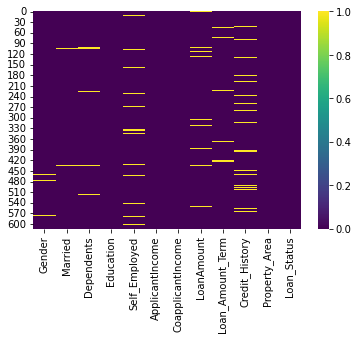

In [216]:
sns.heatmap(df.isnull(),cmap='viridis')

- Looking at the null data, we need use the imputation technique:

In [217]:
#filling null values with mode in categorical data:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

#filling null values with mean in numerical columns:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [218]:
#checking the null values again:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- No null values are seen, all are filled appropriately.

In [219]:
df.shape

(614, 12)

- There are 614 rows and 12 columns in the dataset.

In [220]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

- There are 12 columns as mentioned above, from which Loan_Status is the target.

In [221]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

It shows the number of unique values present in each column.

### Dividing the columns in Numerical and categorial for analysis:

In [222]:
#Categorical columns
c_columns = [x for x in df.columns if df[x].dtypes=='O']
#Numerical columns
n_columns = [y for y in df.columns if df[y].dtypes!='O']

In [223]:
c_columns,  n_columns

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

### Checking the missing or double values in the object columns because sometimes the values are missing or redundantly repeated.

In [224]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [225]:
df["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [226]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [227]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [228]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [229]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [230]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

- None of the above columns have any missing values.

In [231]:
#Checking duplicates as how they were present in the Big DataMart Sales Problem:
df.duplicated().sum()

0

- No duplicates are found in the dataset

## Data Visualization [EDA]

#### Univariate Analysis: 

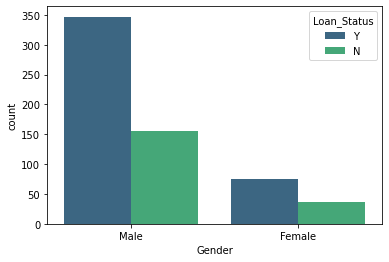

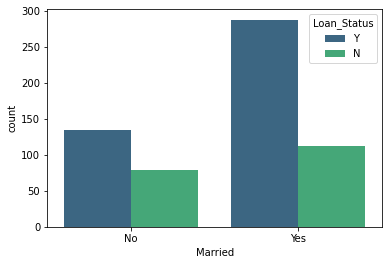

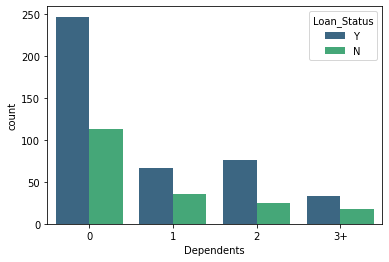

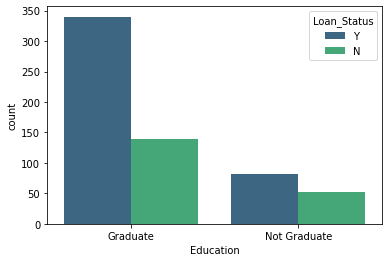

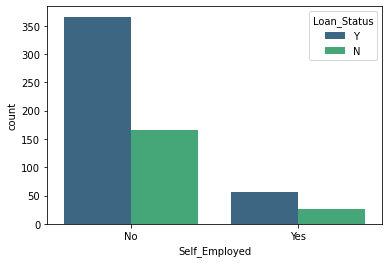

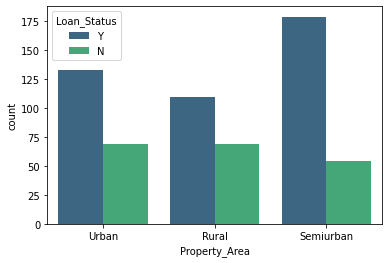

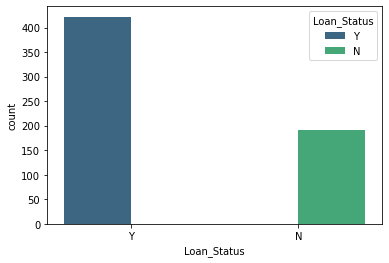

In [162]:
for i in df[c_columns]:
    plt.figure(figsize=(6,4))
    sns.countplot(df[i],data=df, hue='Loan_Status', palette='viridis')
    plt.show()

Observations: 
- Gender:
    - Male were more in count compared to female for the Loan application status.
    - Males were given more loans compared to females.
- Married:
    - About 400 people were married in seeking the loan application compared to the almost 220 which were not married.
    - Of the married, around 300 were given loan.
- Dependents:
    - Applicants who had no dependents were given loan, and those who had 3+ dependents were least in number to apply
- Education:
    - Around 500 were graduates, while 110-120 were non graduates.
    - Of the graduates, 350 approx people were given loan, whereas rest were not qualified to get the loan.
- Self_Employed:
    - Most people were self employed compared to those who had jobs/didnt have jobs. It means max people were businessmem/women.
- Property_area:
    - From the semiUrban area, people applied for loan more, while in Rural area the applicants were less. Although there was not much difference between the Urban and rural area applications.
- Loan Status:
    - Most loans seem to be approved (around 420), while around 200 were not approved for some reasons.


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

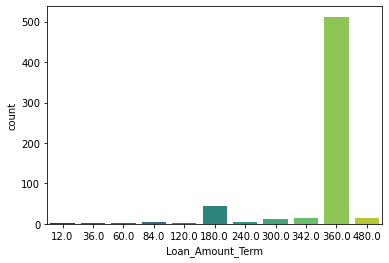

In [163]:
sns.countplot(df['Loan_Amount_Term'],palette='viridis')

The maximum term for the loan amount seems to be 360.0

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

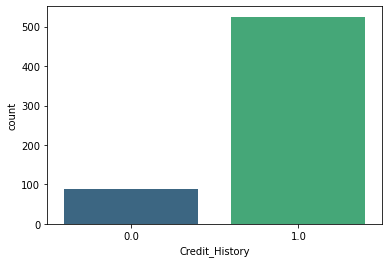

In [164]:
sns.countplot(df['Credit_History'],palette='viridis')

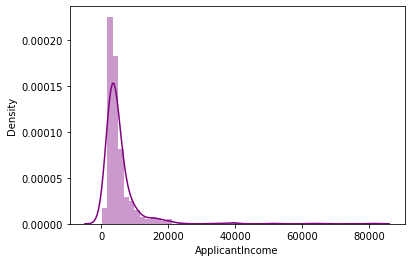

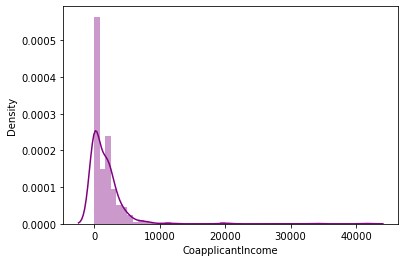

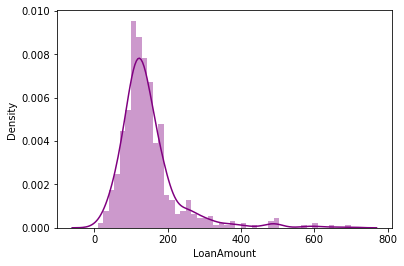

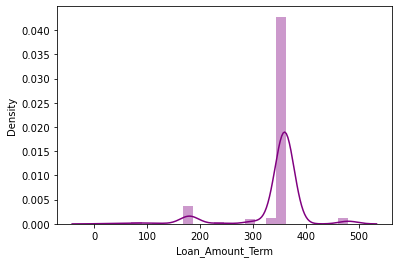

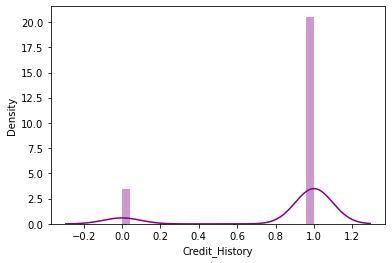

In [165]:
for i in df[n_columns]:
    plt.figure()
    sns.distplot(df[i],color='purple')

Above data shows graphical representation of numerical columns in the given dataset.
- Skewness is seen in all the columns.
- Maximum coapplicant income seems to be 20000
- Maximum non coapplicant income is 10000.
- Loan Amount term looks like between 350-360
- Credit history is 1.0

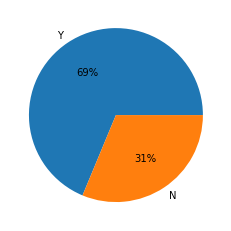

In [166]:
labels="Y","N"
fig, pc = plt.subplots()
pc.pie(df['Loan_Status'].value_counts(), labels=labels, autopct='%1.0f%%')
plt.show()

As per the pie chart, 69% of the people were granted the Loan,while 31% were rejected for the Loan.

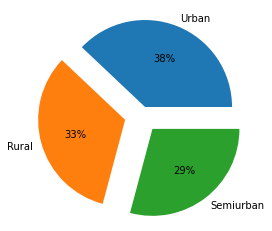

In [167]:
labels='Urban','Rural','Semiurban'
fig, pc = plt.subplots()
explode = (0.1, 0.2, 0.2)
pc.pie(df['Property_Area'].value_counts(), labels=labels, autopct='%1.0f%%',explode=explode)

plt.show()

38% Urban population,33% Rural and 29% SemiUrban population applied for the loan application.

##### Bivariate Analysis

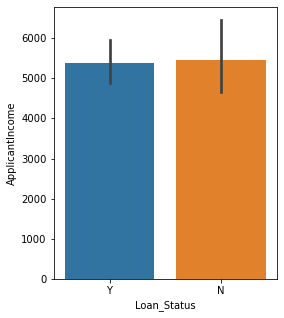

In [167]:
plt.figure(figsize=(4,5))
sns.barplot(x = 'Loan_Status' , y ='ApplicantIncome',data = df)
plt.show()

Based on the Applicant Income,Loans were equally given and rejected at the income of 5000.

<Figure size 720x504 with 0 Axes>

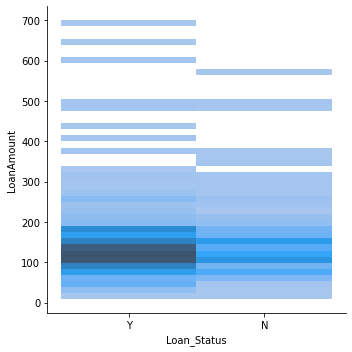

In [175]:
plt.figure(figsize=(10,7))
sns.displot(x = 'Loan_Status' , y ='LoanAmount' , data = df)
plt.show()

- Loan Amount till 700 were considered to be given to the applicants. 
- The maximum range of Loan amount was between 50-200, where the conecntration of the amount for the applications were for 100-150 amount. 

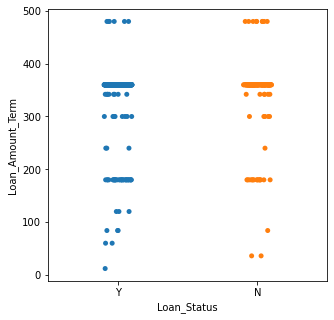

In [181]:
plt.figure(figsize=(5,5))
sns.stripplot(x = 'Loan_Status' , y ='Loan_Amount_Term' , data = df)
plt.show()

The Loan Amount Term was pretty much similar for the applicants who got the Loan and whose loans were rejected.

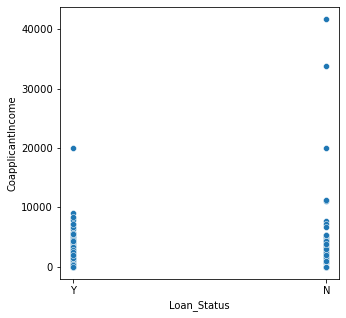

In [183]:
plt.figure(figsize=(5,5))
sns.scatterplot(y = 'CoapplicantIncome' , x='Loan_Status', data = df)
plt.show()

- The coapplicants income ranged between 0-10000 for those who got the loans, and exceptional case was when it was 20000.
- For the people who couldnt get loans, the coapplicants income seem to be in the range of 0-8000, where at few times it exceed above 10000 till 40000

<Figure size 1080x432 with 0 Axes>

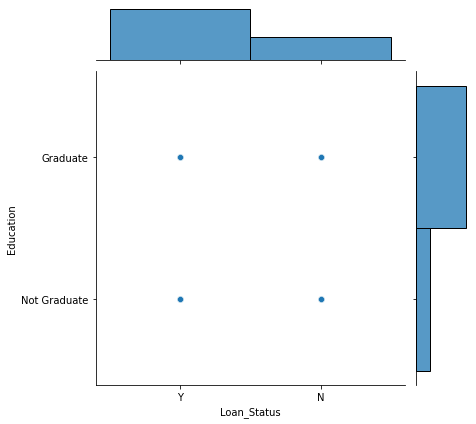

In [186]:
plt.figure(figsize=(15,6))
sns.jointplot(x = 'Loan_Status' , y ='Education' , data = df)
plt.show()

- The people whose education was graduates were given loans more than those who werent graduates.

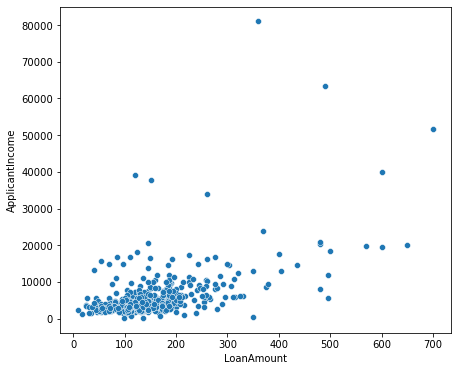

In [202]:
plt.figure(figsize=(7,6))
sns.scatterplot(y = 'ApplicantIncome' , x ='LoanAmount' , data = df)
plt.show()

- Loan amount sem to be increasing a bit as per the applicants Income, but maximum loan amount to be given was between0-200, at an income between 0-10000

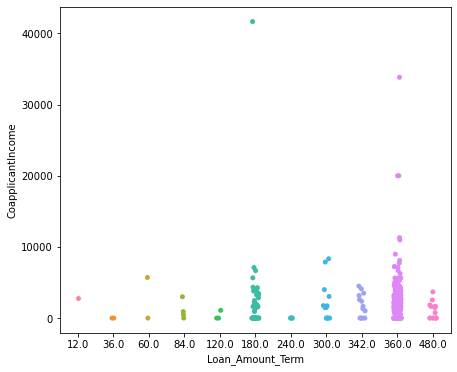

In [203]:
plt.figure(figsize=(7,6))
sns.stripplot(x = 'Loan_Amount_Term' , y ='CoapplicantIncome' , data = df)
plt.show()

Maximum loan amount term was 480.0, and least was 12.0. Most applicants were considered for 360.0 Loan Amount Term,And the income of the coapplicant seem to be between 0-10000 mostly.

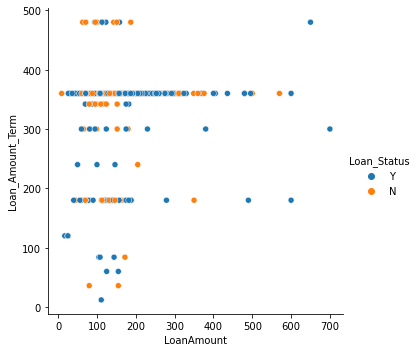

In [204]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')

- Loan amount term was given to maximum applicant at 360, irrespective of loan approval.
- Even though Loan amount started at 100, it went till 700 in some case with a term of 360.0
- Very few were given loan at the term of 120, and below the maount of 100.

### Multivariate Analysis

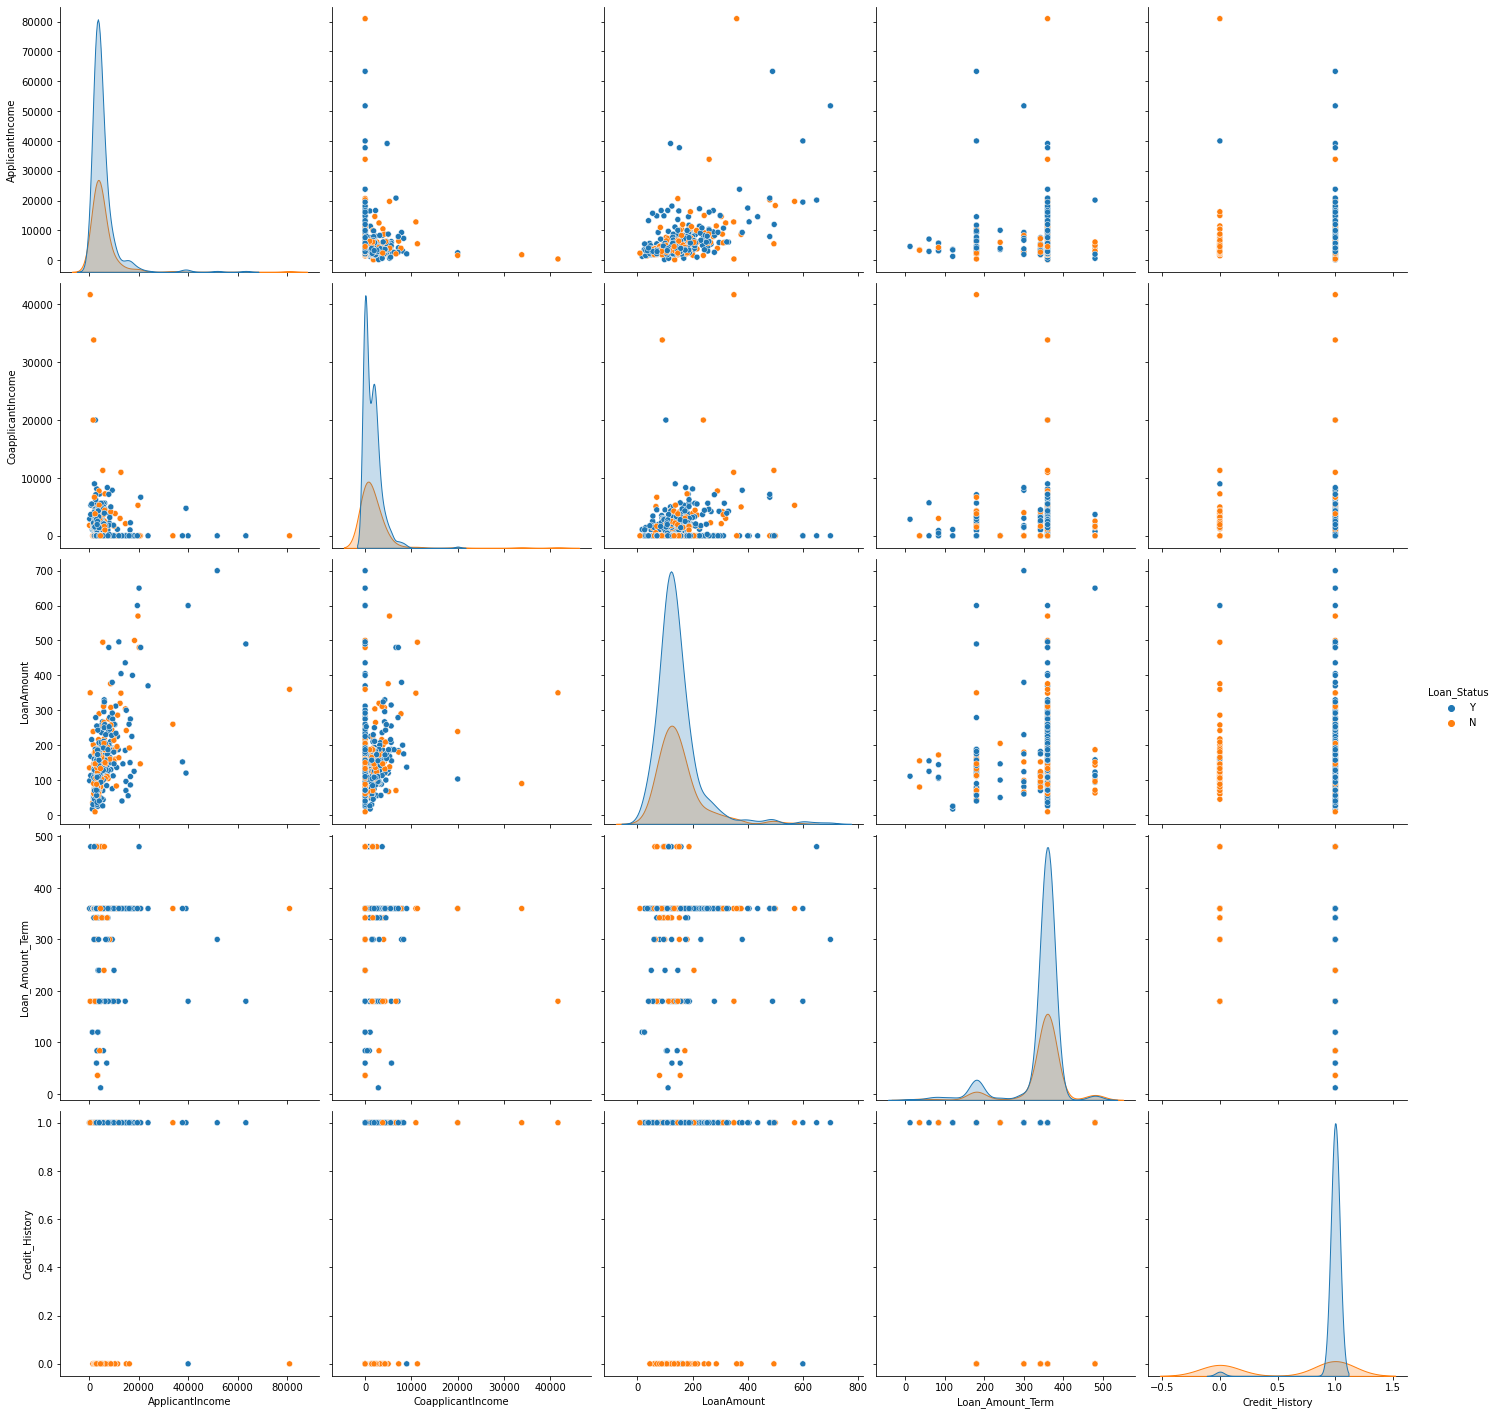

In [209]:
sns.pairplot(data=df,height=4,kind='scatter',hue='Loan_Status')

The plots show the relationship between all the columns with each other, keeping in consideration the target column('Loan_Status'). 

## Label Encoding:
 - I will use the Label encoder for the target column, because I read it somewhere that label encoder is best for target columns.
 - For other columns I will used the Ordinal encoder.

In [232]:
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [233]:
oe=OrdinalEncoder()
oe=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in oe:
    df[i]=le.fit_transform(df[i].astype(str))

In [234]:
#checking the encoded values:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


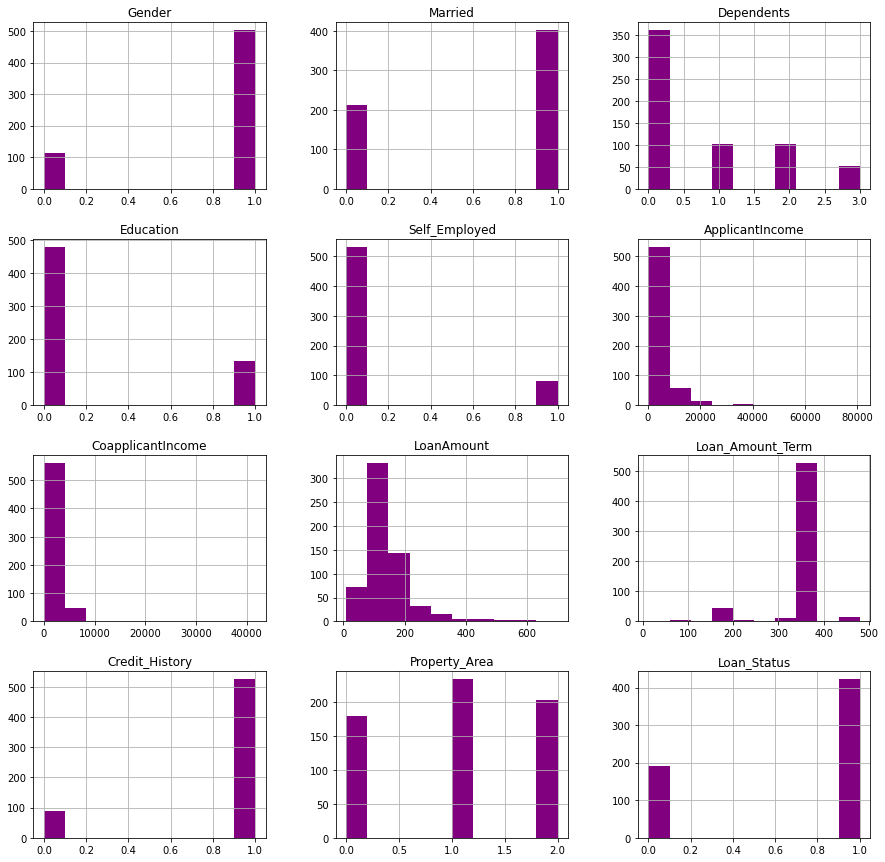

In [25]:
df.hist(figsize=(15,15),color='purple')
plt.show()

These histograms shows graphical representation of every column in the dataset

In [26]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


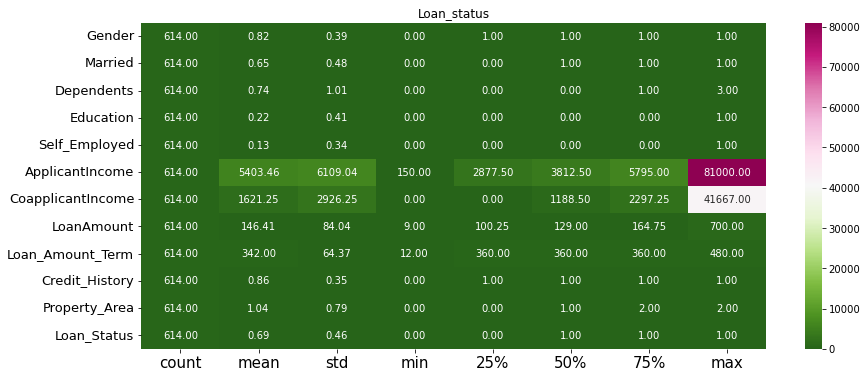

In [27]:
plt.figure(figsize=(14,6))
sns.heatmap(df.describe().transpose(),annot=True,fmt='0.2f',cmap='PiYG_r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Loan_status")
plt.show()

In the above heatmap:
- The mean is > median in Loan_Amount,CoapplicantIncome,APplicantIncome-- which means that the distribution is right skewed.
- The standard deviation is very high in the CoapplicantIncome, ApplicantIncome indicating that the data is highly spread. 
- The difference between the 75% percentile and max is huge in the columns LoanAmount, LoanAmountTerm, CoapplicantIncome and ApplicantIncome, which means that outliers may be present.
- Rest of the data in the dataset shows normalcy, as most columns are categorical and encoded.

### Check Correlation of columns with the target:

In [28]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


<AxesSubplot:>

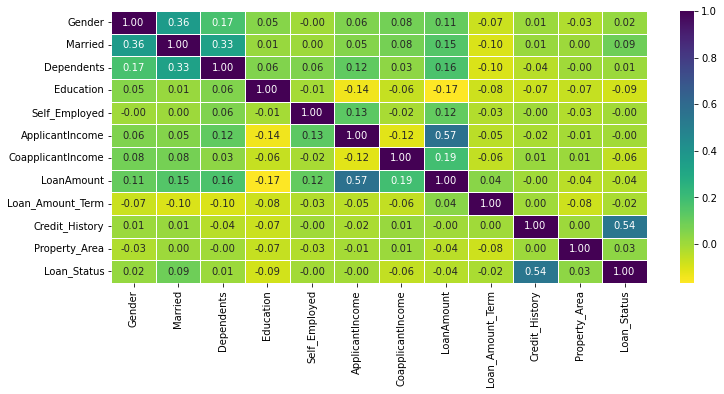

In [29]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),cmap='viridis_r',annot=True,linewidth=0.5,fmt='0.2f')

Our Target column is Income:

    - Negative correlation is seen with the Education,CoapplicantIncome,LoanAmount and LoanAmountTerm columns, with -0.09, -0.06, -0.04 and -0.02 values respectively.
    - Credit history columns shows most positive correlation at 0.54.
    - Married column shows secod most positive correlation with the target column.
    - Rest all columns (Gender,Dependents,PropertyArea shows a positive correlation.
    - Self_employed,ApplicantIncome shows almost -0 correlation.

In [30]:
df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

The above values show the correlation with the target column in a descending order.

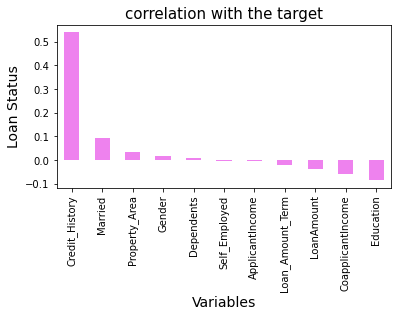

In [31]:
plt.figure(figsize=(6,3))
df.corr()["Loan_Status"].sort_values(ascending=False).drop(["Loan_Status"]).plot(kind='bar', color='violet')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Loan Status",fontsize=14)
plt.title("correlation with the target",fontsize=15)
plt.show()

- Negative correlation is seen with the Education,CoapplicantIncome,LoanAmount and LoanAmountTerm columns. 
- Maximum negative correlation is seen with the Education column, hence we can consider dropping that column.
- Maximum positive relation is with the column Credit history.

In [235]:
df.drop('Education',axis=1,inplace=True)

In [34]:
#to check if the colum is dropped or not?
df.head(1)

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1


## Checking Outliers

Gender                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Married              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Dependents           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Self_Employed        AxesSubplot(0.523571,0.536818;0.110714x0.343182)
ApplicantIncome      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
CoapplicantIncome    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
LoanAmount                 AxesSubplot(0.125,0.125;0.110714x0.343182)
Loan_Amount_Term        AxesSubplot(0.257857,0.125;0.110714x0.343182)
Credit_History          AxesSubplot(0.390714,0.125;0.110714x0.343182)
Property_Area           AxesSubplot(0.523571,0.125;0.110714x0.343182)
Loan_Status             AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

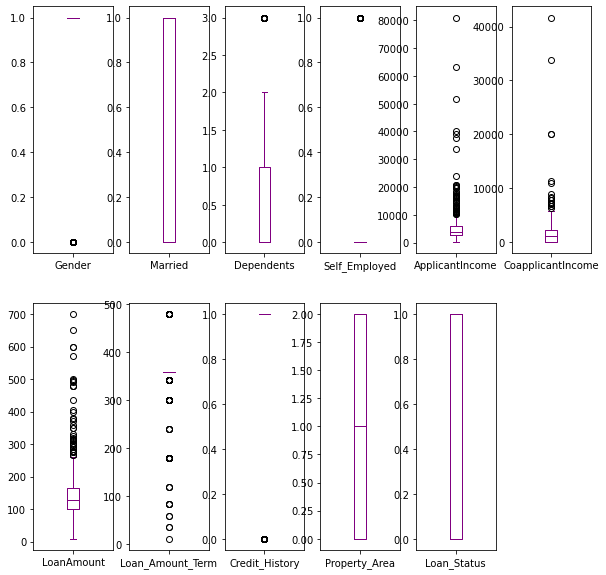

In [35]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10), color='purple')

It shows that can be many outliers present in all the numerical columns -ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term, while few outliers may be seen in Credit_History, Dependents and SelfEmployed columns.

### Removing The Outliers with Zscore method.

In [42]:
#Removing The Outliers with Zscore method from numerical coulmns.

from scipy.stats import zscore
z=zscore(df[['Dependents','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
z.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.737806,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.411733
1,0.253470,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.411733
2,-0.737806,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.411733
3,-0.737806,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.411733
4,-0.737806,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.411733


In [43]:
threshold=3
print(np.where(z>3))

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
       333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
       581, 600, 604], dtype=int64), array([3, 2, 4, 2, 4, 2, 4, 3, 4, 2, 2, 4, 4, 2, 4, 4, 3, 2, 3, 4, 2, 4,
       4, 4, 4, 4, 3, 3, 4], dtype=int64))


we have taken 3 as the threshold value, because anything beyond the z score value of 3 is an outlier.

In [44]:
z.iloc[9,3]

3.196712546212882

Checking the position of the outlier

In [45]:
DF=df[(z<3).all(axis=1)]
DF.head() 

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [46]:
print('Old_DF:',df.shape)
print('New_DF:',DF.shape)
print('total dropped rows:',df.shape[0]-DF.shape[0])

Old_DF: (614, 11)
New_DF: (589, 11)
total dropped rows: 25


### Percentage data loss

In [47]:
loss_percent=(614-589)/614*100
print(loss_percent,'%')

4.071661237785016 %


The percentage data loss after removal of outliers is 4.071%, which is considerable, as it is not 10% or more.

## Check Skewness

In [236]:
x=DF.drop('Loan_Status',axis=1)
y=DF['Loan_Status']

In [237]:
x.shape,y.shape

((589, 10), (589,))

In [238]:
x.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.433130
Credit_History      -2.010069
Property_Area       -0.063183
dtype: float64

All the columns show skewness except Property_Area

In [51]:
from sklearn.preprocessing import power_transform
X=power_transform(x)
X

array([[ 0.47653262, -1.36353339, -0.81499401, ...,  0.1859348 ,
         0.41349021,  1.19229493],
       [ 0.47653262,  0.73338872,  0.88859228, ...,  0.1859348 ,
         0.41349021, -1.34552613],
       [ 0.47653262,  0.73338872, -0.81499401, ...,  0.1859348 ,
         0.41349021,  1.19229493],
       ...,
       [ 0.47653262,  0.73338872,  0.88859228, ...,  0.1859348 ,
         0.41349021,  1.19229493],
       [ 0.47653262,  0.73338872,  1.33710718, ...,  0.1859348 ,
         0.41349021,  1.19229493],
       [-2.09849225, -1.36353339, -0.81499401, ...,  0.1859348 ,
        -2.41843694,  0.00662524]])

In [52]:
type(X)

numpy.ndarray

In [53]:
x=pd.DataFrame(X, columns=x.columns)
x.head(2)

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476533,-1.363533,-0.814994,-0.3849,0.688986,-1.119438,0.316179,0.185935,0.41349,1.192295
1,0.476533,0.733389,0.888592,-0.3849,0.239843,0.748807,-0.012325,0.185935,0.41349,-1.345526


In [54]:
x.skew()

Gender              -1.626104
Married             -0.631755
Dependents           0.465930
Self_Employed        2.218831
ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060143
Loan_Amount_Term     0.396698
Credit_History      -2.010069
Property_Area       -0.157636
dtype: float64

- Skewness is removed from all numerical columns

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

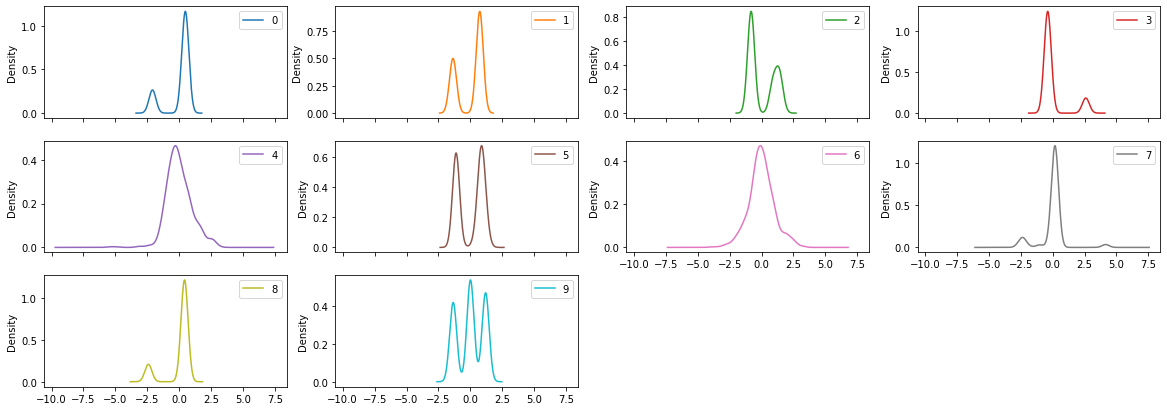

In [55]:
pd.DataFrame(X).plot(kind='kde',subplots=True,layout=(3,4),figsize=(20,7))

#### As seen from the above plot, the skewness is removed.

### Multicollinearity check :Variance Inflation factor

In [56]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [57]:
x.shape,y.shape, x.shape[1]

((589, 10), (589,), 10)

In [58]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [59]:
vif_calc()

   VIF Factor           features
0    1.207696             Gender
1    1.430777            Married
2    1.181626         Dependents
3    1.058120      Self_Employed
4    1.746101    ApplicantIncome
5    1.584096  CoapplicantIncome
6    1.557485         LoanAmount
7    1.049146   Loan_Amount_Term
8    1.003329     Credit_History
9    1.018519      Property_Area


Here, none of the values are above 10.Hence we can say safely that there is no multicolinearity.

## SMOTE
(As the target column was highly imbalanced)

In [60]:
from imblearn.over_sampling import SMOTE

smt=SMOTE()
xtrain,ytrain=smt.fit_resample(x,y)
xtrain.value_counts()

Gender     Married    Dependents  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
-2.098492  -1.363533  -0.814994   -0.384900      -3.152954         1.054787          -0.301250    4.149087          0.413490       -1.345526        1
 0.476533   0.733389  -0.814994    2.598076       2.623697        -1.119438           1.941833    0.185935          0.413490        1.192295        1
                                                 -0.774108         1.031587           0.623877   -2.321361         -2.418437       -1.345526        1
                                                 -0.525799        -1.119438          -1.391277    0.185935          0.413490        1.192295        1
                                                 -0.270613        -1.119438          -2.836690   -2.570379          0.413490        0.006625        1
                                                  0.142051         0.517510          -0.861424    0.18593

In [61]:
ytrain.value_counts()

1    407
0    407
Name: Loan_Status, dtype: int64

In [62]:
y=ytrain
x=xtrain

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

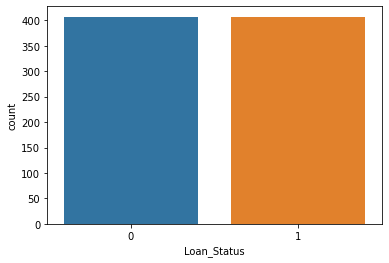

In [63]:
sns.countplot(y)

The target column is balanced now for further learning.

## Scaling The Data using Standard Scaler

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x=x1
x

array([[ 0.47394892, -1.33049167, -0.8129309 , ...,  0.13580263,
         0.52971156,  1.22527175],
       [ 0.47394892,  0.76870785,  0.92243742, ...,  0.13580263,
         0.52971156, -1.30229694],
       [ 0.47394892,  0.76870785, -0.8129309 , ...,  0.13580263,
         0.52971156,  1.22527175],
       ...,
       [ 0.47394892,  0.76870785,  1.49565636, ...,  0.13580263,
         0.52971156,  0.53063347],
       [ 0.47394892,  0.76870785,  1.57709107, ...,  0.13580263,
         0.52971156, -0.785657  ],
       [ 0.47394892, -1.33049167, -0.28956401, ...,  0.13580263,
         0.52971156, -1.30229694]])

# Training of the data

### Finding the best random fit

In [87]:
MaxAcu=0 #Max Accuracy
MaxRS=0 #best random state for which best accuracy is acheived

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.33,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    
    if acc>MaxAcu:
        MaxAcu=acc
        MaxRS=i
    
print(f"At random state {i} the Maximum accuracy score is: {acc*100}")   

At random state 99 the Maximum accuracy score is: 68.31501831501832


#### At random state 99 the Maximum accuracy score is: 68.31%

Moving on with the train test split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.33,random_state=99)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((268, 10), (546, 10), (268,), (546,))

### Random Forest Classifier

In [89]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

79.12087912087912


### K Neighbour Classifier

In [90]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score (y_test, predkn)*100)

68.13186813186813


### SVC

In [91]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score (y_test, predsvc)*100)

71.24542124542124


### Decision Tree Classifier

In [92]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)

71.6117216117216


### Gradient boosting Classifier

In [93]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc)*100)

75.64102564102564


### AdaBoost Classifier

In [94]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad)*100)

72.89377289377289


### ExtraTreesClassifier

In [95]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(accuracy_score(y_test,predet)*100)

77.83882783882784


#### Random Forest Classifier gives best accuracy score of 79.12% of all the tried algorithmns. But let us check it with the cross validation method

## Cross Validation Method

In [96]:
scr=cross_val_score(lg,x,y,cv=6)
print("Cross validadtion score of Logistic regression Model is", scr.mean())

scr=cross_val_score(rf,x,y,cv=6)
print("Cross validadtion score of Random Forest Classifier is", scr.mean())

scr=cross_val_score(kn,x,y,cv=6)
print("Cross validadtion score of KNeighborClassifier is", scr.mean())

scr=cross_val_score(svc,x,y,cv=6)
print("Cross validadtion score of SVC is", scr.mean())

scr=cross_val_score(dtc,x,y,cv=6)
print("Cross validadtion score of DecisionTreeClassifier is", scr.mean())

scr=cross_val_score(gbc,x,y,cv=6)
print("Cross validadtion score of GradientBoostingClassifier is", scr.mean())

scr=cross_val_score(ad,x,y,cv=6)
print("Cross validadtion score of AdaBoostClassifier is", scr.mean())

scr=cross_val_score(et,x,y,cv=6)
print("Cross validadtion score of Extra Trees Classifier is", scr.mean())

Cross validadtion score of Logistic regression Model is 0.7039124909222948
Cross validadtion score of Random Forest Classifier is 0.818291575889615
Cross validadtion score of KNeighborClassifier is 0.7542302106027595
Cross validadtion score of SVC is 0.7235838779956428
Cross validadtion score of DecisionTreeClassifier is 0.7715323166303559
Cross validadtion score of GradientBoostingClassifier is 0.791358024691358
Cross validadtion score of AdaBoostClassifier is 0.7618191721132899
Cross validadtion score of Extra Trees Classifier is 0.8415849673202613


### From the cross validadtion score Random Forest Classifier gives the best fit, where the CV score is 81.82% and the Accuracy score is 79.12%. The difference between these scores is the least from all  the algorithms, hence the Random Forest Classifier is the best suited algorithm.

## Hyper parameter tuning of Random Forest Classifier

In [97]:
#creating parameters to pass in Grid search
para={ 'criterion': ['gini','entropy','log_loss'],'n_estimators': [100,150,200],'max_features': ['None', 'sqrt', 'log2'],'max_depth': [4,5,6,7]}

In [98]:
GCV=GridSearchCV(RandomForestClassifier(),para,cv=6)
GCV.fit(x_train,y_train) #fiting the data in the model
GCV.best_params_         #printing the best parameter found by GCV

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 150}

In [99]:
#Final Model:
FM=RandomForestClassifier(criterion='gini', max_depth=7, max_features= 'log2',n_estimators=150)
FM.fit(x_train,y_train)
predr=FM.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,predr)*100)
print("Best Accuracy Score for GCV best estimator", FM, "is",accuracy_score(y_test,predr)*100)

Accuracy Score: 77.47252747252747
Best Accuracy Score for GCV best estimator RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=150) is 77.47252747252747


In [100]:
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

[[184  84]
 [ 39 239]]
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       268
           1       0.74      0.86      0.80       278

    accuracy                           0.77       546
   macro avg       0.78      0.77      0.77       546
weighted avg       0.78      0.77      0.77       546



### AUC ROC Scores:

In [102]:
from sklearn.metrics import roc_auc_score

#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,pred))
#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,predrf))
#KNeighbour Classifier
print("KNeighbour Classifier:",roc_auc_score(y_test,predkn))
#SVC
print("SVC:",roc_auc_score(y_test,predsvc))
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,preddtc))
#GB Classifier
print("GB Classifier:",roc_auc_score(y_test,predgbc))
# AdaBoostClassifier
print("AdaBoost Classifier:",roc_auc_score(y_test,predad))
#Extra Trees Classifier
print("Extra Trees Classifier:",roc_auc_score(y_test,predet))

Logistic Regression: 0.6814667668849995
Random Forest Classifier: 0.7904005154085687
KNeighbour Classifier: 0.681345968001718
SVC: 0.710646408246537
Decision Tree Classifier: 0.7157870718350692
GB Classifier: 0.7550198647052508
AdaBoost Classifier: 0.7279072264576398
Extra Trees Classifier: 0.7780119188231505


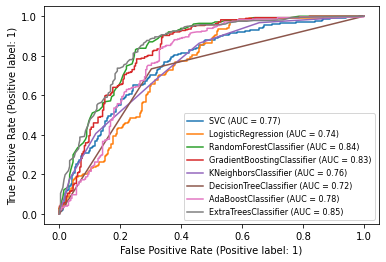

In [104]:
from sklearn.metrics import plot_roc_curve

graph = plot_roc_curve(svc,x_test,y_test)
model= [lg,rf,gbc,kn,dtc,ad,et]

for i in model:
    plot_roc_curve(i,x_test,y_test, ax=graph.ax_)
plt.legend(prop = {'size':8}, loc = 'lower right')
plt.show()

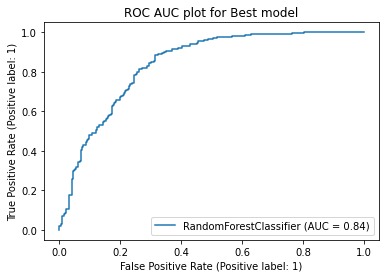

In [105]:
plot_roc_curve(FM,x_test,y_test)
plt.title("ROC AUC plot for Best model")
plt.show()

This shows that Area Under the Curve for Gradient boosting classifier is 84%

## Saving the best model : Gradient boosting Classifier

In [107]:
#saving the model 
import joblib
joblib.dump(FM,'Loan_application.pkl')

['Loan_application.pkl']

In [108]:
loadmodel = joblib.load('Loan_application.pkl')

In [109]:
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,0,1
9,0,0


### Conclusion: 
- Best Accuracy Score for GCV best estimator RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=150) is 77.47%
- This means that the model works well 77% and can be used to predict the outcome for the loan application of the people as shown above.

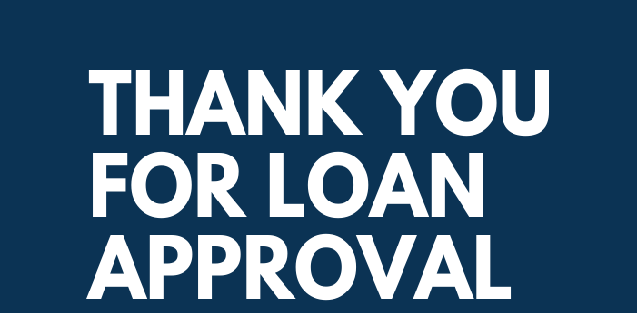